## 异常检测分析  

-  **什么是异常检测**  
> 定义： 孤立点、离群、与众不同、超出范围、不在预期...  
> 原因： 测量误差、记录误差、随机、非随机其他因素导致...  
> 应用： 故障检测、网络入侵、欺诈分析、医疗药物...  

-  **异常vs正常**  
> 一个人的异常可能是另一个人的信号  --推断来自抽样，应用需要谨慎  
作为运动青年和普通青年的差异：  
![科比](./kebb.png)  

-  **异常检测方法**  
> 统计：非随机性   
> 密度：且看身边  
> 聚类：无从归属   
> 其他：距离、序列、偏差...

-  **统计--异常检测方法**  
3σ原则， 小概率事件

In [2]:
# 随机数据 生成
n=1000;sdout=3
x=rnorm(n,mean=0,sd=1)
y=rnorm(n,mean=5,sd=2)

看分布

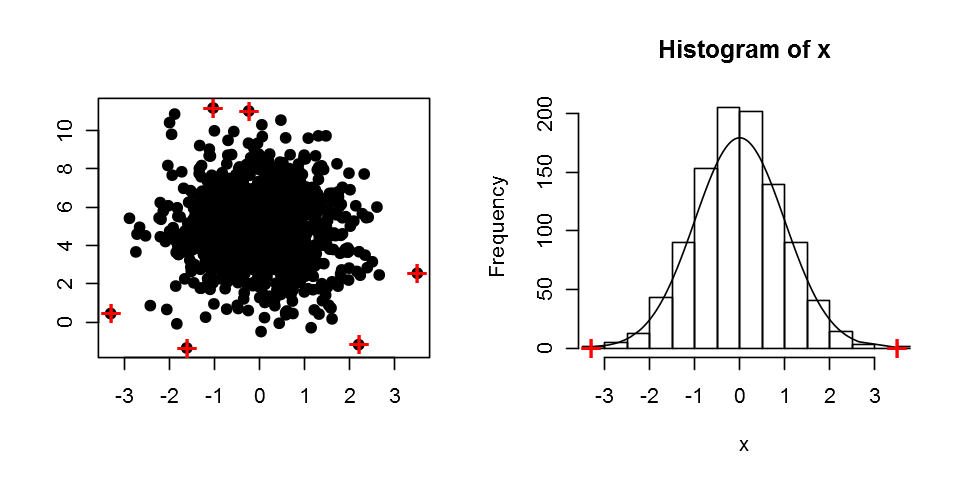

In [3]:
par(mfrow = c(1, 2), ann = FALSE)
options(repr.plot.width=8, repr.plot.height=4)
# 二维布局 
plot(x,y,pch=19,cex=1)
oindx=abs(x-0)>sdout*1;oindy=abs(y-5)>sdout*2
oindxy=oindx | oindy  
points(x[oindxy],y[oindxy],pch='+',col='red',cex=2)
# 一维分布
ovalx=x[oindx]
hist(x,xlim=range(x))
lines(sort(x),dnorm(sort(x))*450)
points(ovalx,dnorm(ovalx),pch='+',col='red',cex=2)

看箱图  更直观

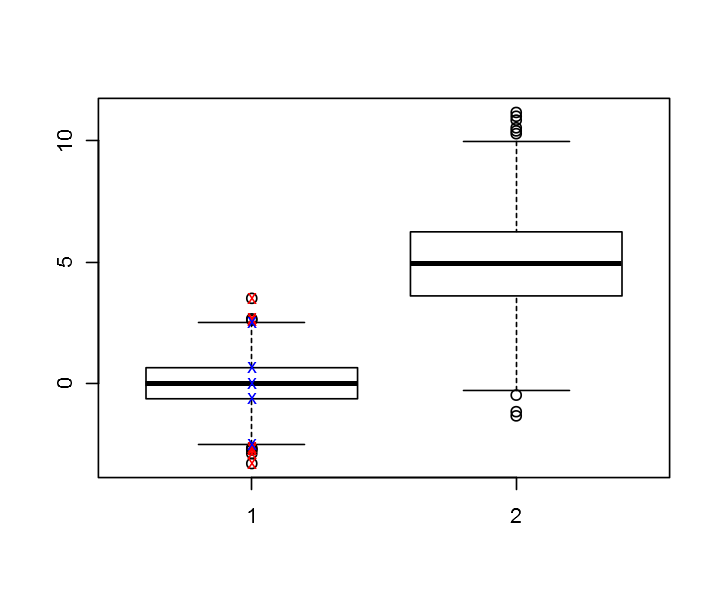

In [4]:
# 箱图 （中位数，四分位数，异常值）
options(repr.plot.width=6, repr.plot.height=5)
boxplot(x,y)
bx=boxplot.stats(x)
#for (i in bx$out) points(i,pch='+',col='red',cex=1)
points(rep(1,length(bx$out)),bx$out,pch='x',col='red',cex=1)
points(rep(1,5),bx$stats,pch='x',col='blue',cex=1)

boxplot画的是什么

In [5]:
#上下边框
bx$stats
fivenum(x)
t(quantile(x,c(25,50,75)/100))
fivenum


[1] -2.53857725 -0.64164594 -0.01525628  0.64187119  2.50415487

[1] -3.31439609 -0.64164594 -0.01525628  0.64187119  3.50446082

25%         50%       75%
[1,] -0.641493 -0.01525628 0.6418033

function (x, na.rm = TRUE) 
{
    xna <- is.na(x)
    if (any(xna)) {
        if (na.rm) 
            x <- x[!xna]
        else return(rep.int(NA, 5))
    }
    x <- sort(x)
    n <- length(x)
    if (n == 0) 
        rep.int(NA, 5)
    else {
        n4 <- floor((n + 3)/2)/2
        d <- c(1, n4, (n + 1)/2, n + 1 - n4, n)
        0.5 * (x[floor(d)] + x[ceiling(d)])
    }
}
<bytecode: 0x000000000a445260>
<environment: namespace:stats>

In [6]:
# 上下边界  （help(boxplot.stats),看coef参数）
#http://r.789695.n4.nabble.com/Whiskers-on-the-default-boxplot-graphics-td2195503.html
IQR(x)
quantile(x,75/100)-quantile(x,25/100)
quantile(x,75/100)+1.5*IQR(x)
bx$stats
sort( x[x>2    & (x< (quantile(x,75/100)+1.5*IQR(x)))] )
sort( x[x<(-2) & (x> (quantile(x,25/100)-1.5*IQR(x)))] )


[1] 1.283296

75% 
1.283296

75% 
2.566748

[1] -2.53857725 -0.64164594 -0.01525628  0.64187119  2.50415487

[1] 2.008577 2.013305 2.092217 2.135265 2.159128 2.200696 2.208786 2.235417
 [9] 2.280962 2.323182 2.342872 2.368078 2.391315 2.411832 2.504155

[1] -2.538577 -2.432817 -2.237406 -2.212499 -2.210641 -2.194135 -2.144703
 [8] -2.097223 -2.066354 -2.043069 -2.034736 -2.004292 -2.003933

既然是统计，既然是分布，那现实(数据)与理想(假设)不符时...

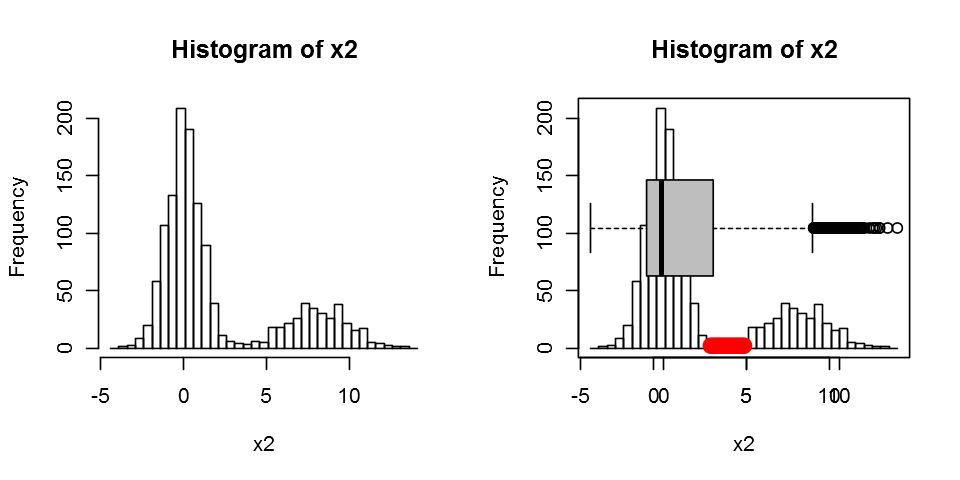

In [7]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2), ann = FALSE)
#
x2=c(rnorm(n,mean=0,sd=1),rnorm(n/3,mean=8,sd=2))
xh=hist(x2,breaks=seq(range(x2)[1]-1,range(x2)[2]+1,0.5))
#
xh=hist(x2,breaks=seq(range(x2)[1]-1,range(x2)[2]+1,0.5))
lines(range(xh$mids[xh$density<0.01 & xh$mids <5 & xh$mids>1]),c(2,2),col='red',lwd=10 )
par(new=TRUE)
boxplot(x2,horizontal = TRUE,col='grey')

红色区数据从箱图上看，落在上下边界之内，属正常范围。

-  **密度--异常检测方法**  
就近比较，稀疏为异

[LOF 算法](https://en.wikipedia.org/wiki/Local_outlier_factor)
![科比](./lof.png)  

Loading required package: lattice
Loading required package: grid


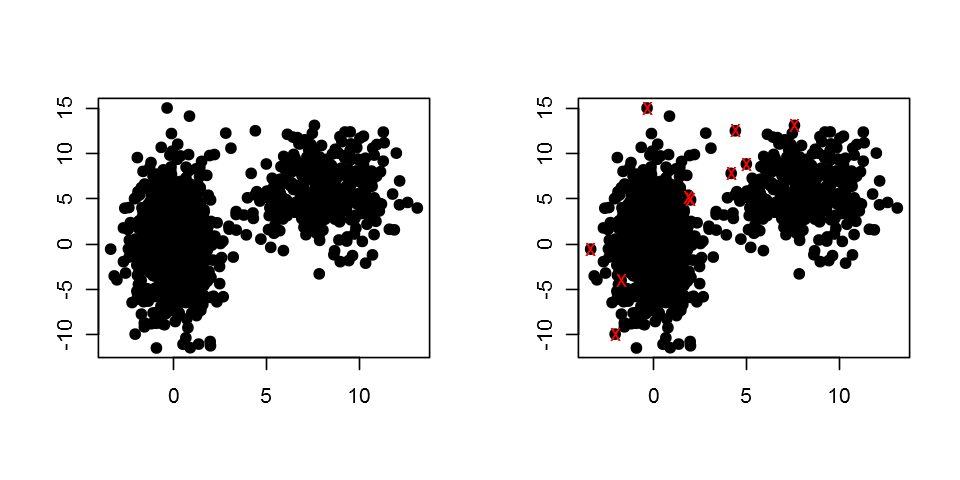

In [8]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2), ann = FALSE)
library(DMwR)
#
y2=c(rnorm(n,mean=0,sd=4),rnorm(n/3,mean=6,sd=3))
dfxy=data.frame(x2=x2,y2=y2)
plot(dfxy,pch=19,cex=1)
#interesting when change k
plot(dfxy,pch=19,cex=1)
score_dfxy=lofactor(dfxy, k = 5)
out_dfxy=order(score_dfxy, decreasing = T)[1:10]
points(dfxy[out_dfxy,],col='red',pch='x',cex=1.2)

-  **聚类--异常检测方法**  
小众，异类

In [9]:
dfxy$cc=NULL

kmeans

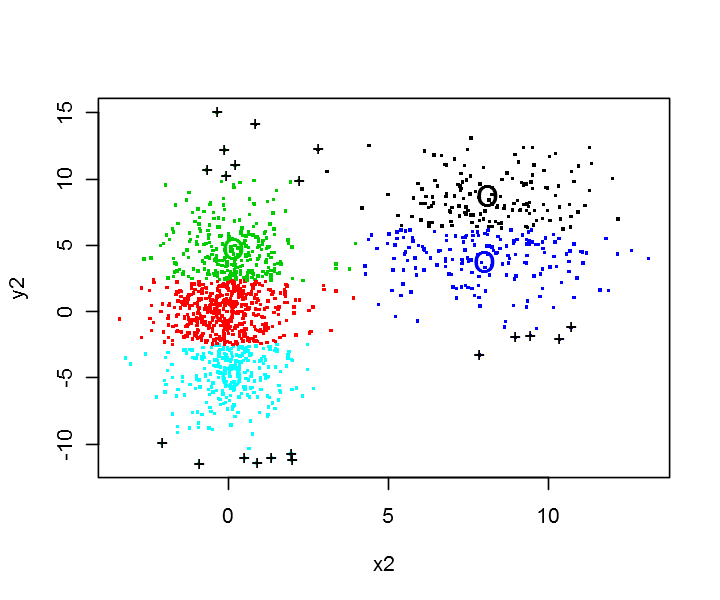

In [29]:
options(repr.plot.width=6, repr.plot.height=5)
nc=5
cc=kmeans(dfxy,nc)
ccout=fitted(cc)
plot(y2~x2,col=rownames(ccout),dfxy,cex=2,pch = ".")
#centers
points(cc$centers, col = 1:nc, pch = "o", cex = 2)  
#outliers
centers=cc$centers[cc$cluster,]
dists=sqrt(rowSums((dfxy-centers)^2))
outers=order(dists,decreasing = TRUE)[1:20]
points(dfxy[outers,c('x2','y2')], col = 9, pch = "+", cex = 1)  

Hierarchical Clustering

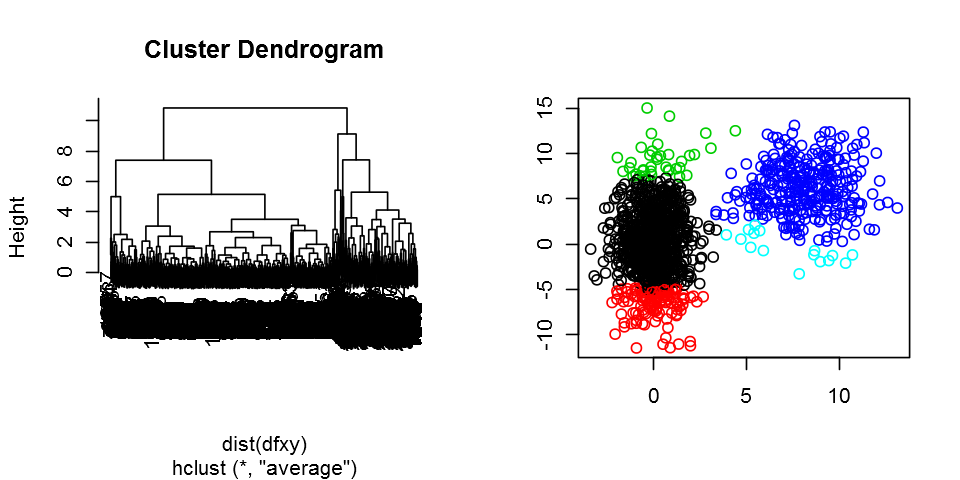

In [30]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2), ann = FALSE)
hc = hclust(dist(dfxy), "ave")
plot(hc)
ccout = cutree(hc, k = 5)
plot(y2~x2,col=ccout,dfxy)

-  **序列异常**  


Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


[1] "TL"

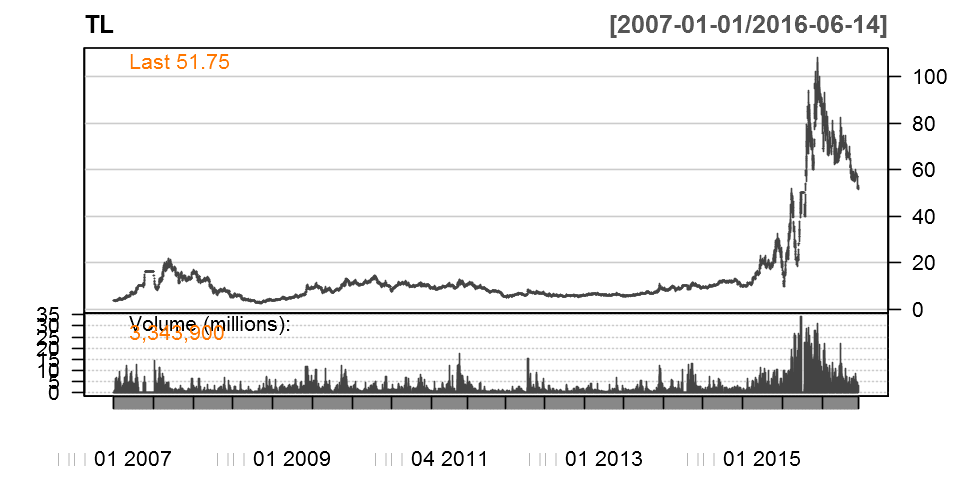

In [31]:
library(quantmod)
options("getSymbols.warning4.0"=FALSE)
setSymbolLookup(TL=list(name="000025.sz",src="yahoo"))
getSymbols("TL")
candleChart(TL,theme='white', type='candles') 

hello R! We can [plotly](https://plot.ly/r/using-r-in-jupyter-notebooks) U !

## 参考
![1]:陈斌,陈松灿等,2009,"异常检测综述",山东大学学报.  
![2]:cador,2014,"[使用R语言进行异常检测](http://youhaolin.blog.163.com/blog/static/224494120201422110628586/)".  
![3]:杨风召,"[异常检测算法综述](http://www.docin.com/p-559232022.html)"  
![4]:杨永铭,王喆,2008.01,"[孤立点挖掘算法研究](http://www.docin.com/p-559232022.html)",计算机与数字工程.  
![5]:高磊,2013,"[虚假交易识别](http://gaolei786.github.io/statistics/fraud.html)"  





